# Tarea 11. Árbol De Decisión
L.E. Rojón
138442

## Boston Housing Data

This data set concerns housing values in suburbs of Boston and has the following sources:
   * (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   * (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   * (c) Date: July 7, 1993

Before it was used in:
    -  Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.
       
Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's
The following document implements the decision trees algorithm to decide if the Crime Rates on the Boston city can be predicted by it's closeness to the Charles River. 

First we load the libraries and packages needed.

In [2]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import graphviz 
from sklearn.tree import export_graphviz
import seaborn as sns
%matplotlib inline
import pydot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing

Now we load the data.

In [3]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', delim_whitespace=True,
               names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD',
                      'TAX','PTRATIO','B','LSTAT','MEDV'])
df.head()
#list(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df['CRIM']
y = df['CHAS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [5]:
X_train=X_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)

X_test=X_test.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)

/home/luxorville/virtualenvs/ML/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/home/luxorville/virtualenvs/ML/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/luxorville/virtualenvs/ML/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/home/luxorville/virtualenvs/ML/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


We adjust a decision tree to the data.

In [6]:
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Now we check with the test set and evaluate the accuracy and the confusion matrix.

             precision    recall  f1-score   support

          0       0.91      0.91      0.91       117
          1       0.00      0.00      0.00        10

avg / total       0.84      0.84      0.84       127

[[107  10]
 [ 10   0]]
('Presicion:', 0.84251968503937003)


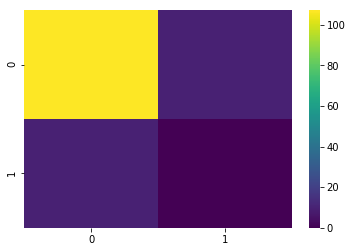

In [7]:
pred = classifier.predict(X_test)

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print('Presicion:',accuracy_score(y_test,pred))
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,cmap='viridis')

Finally, we graph the dendogram.

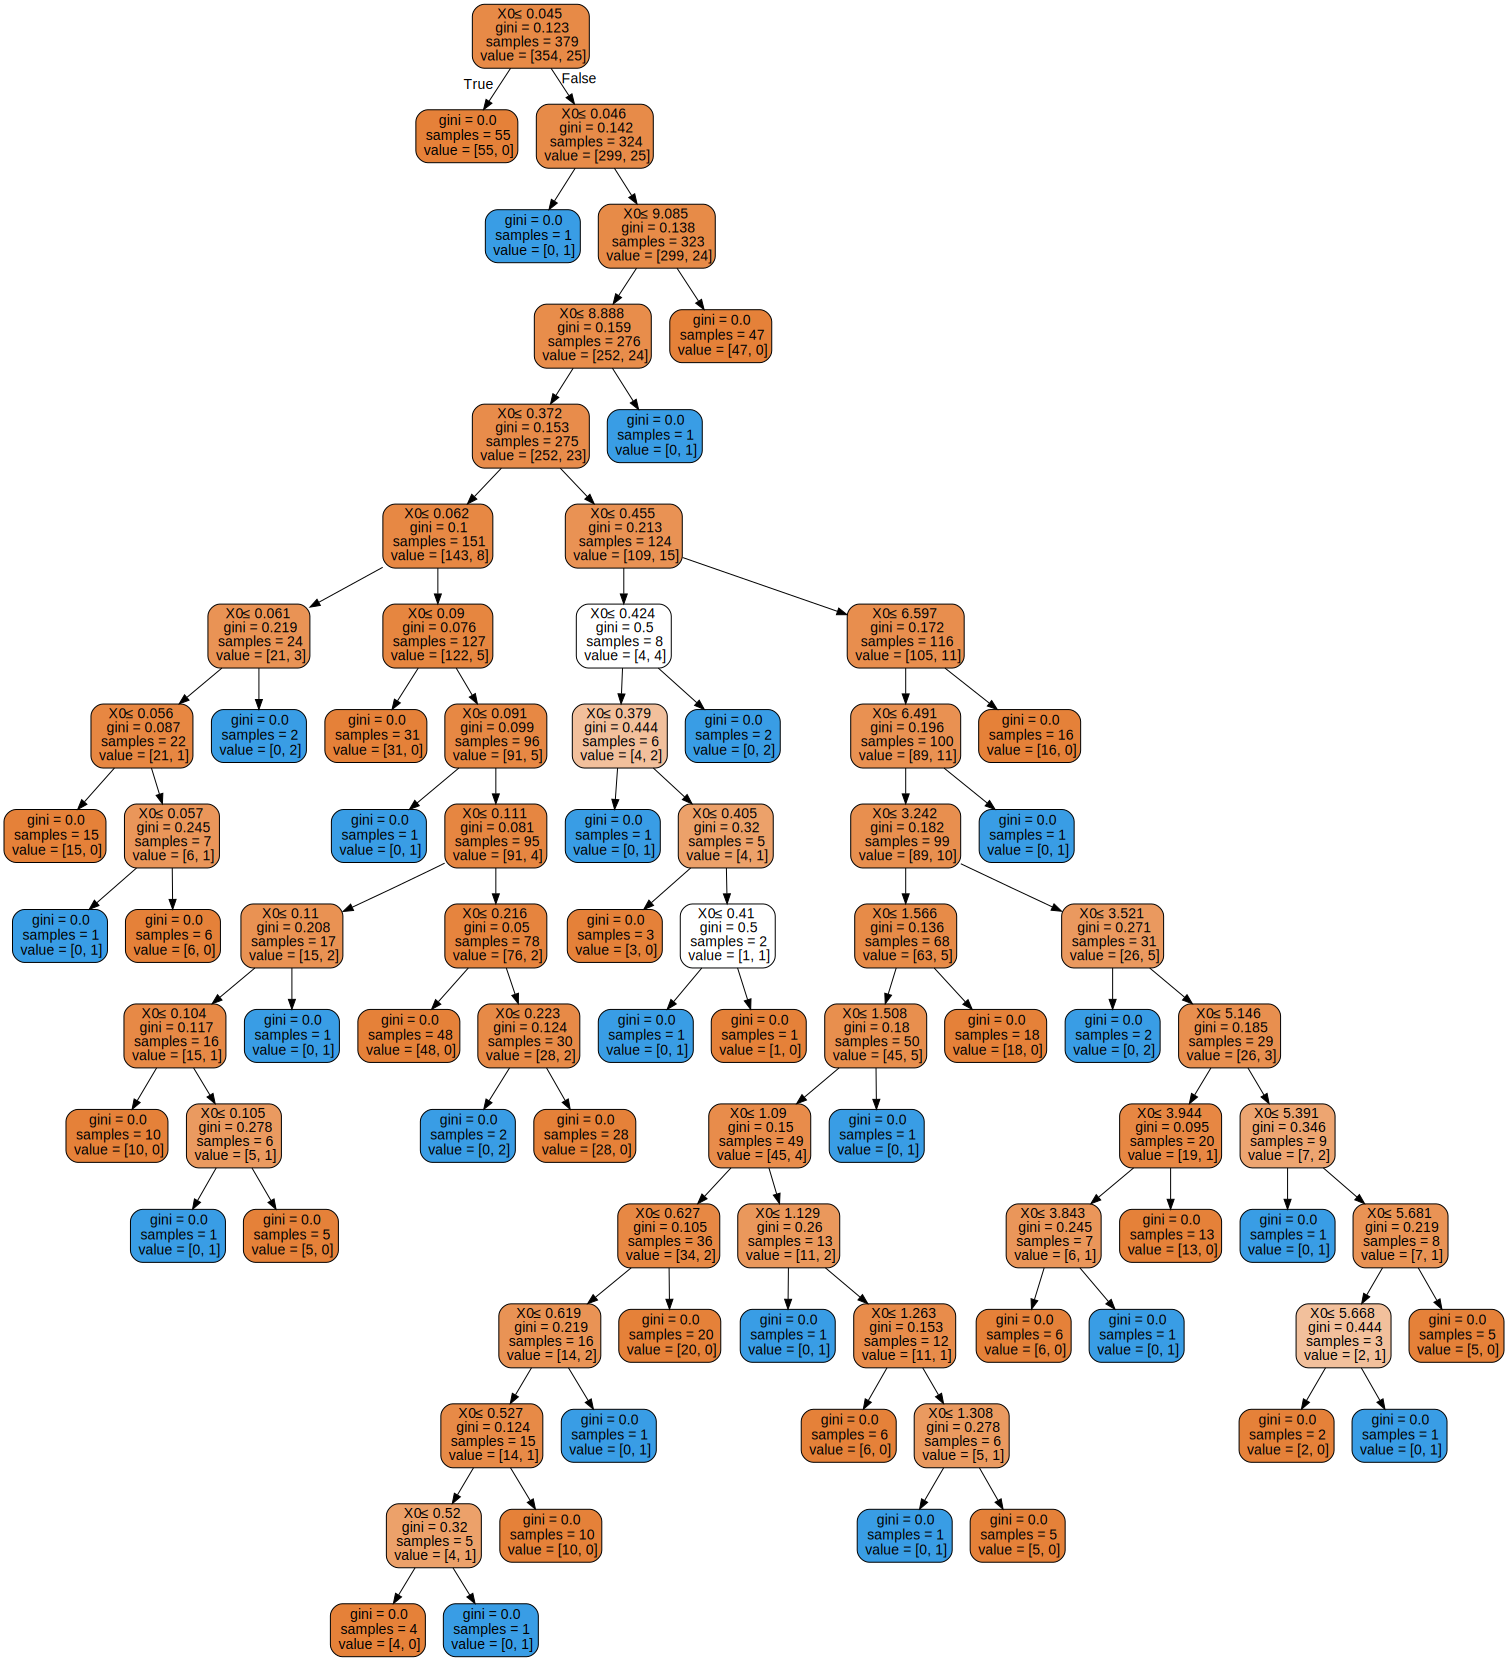

In [8]:
dot_data = tree.export_graphviz(classifier, out_file=None, 
                          
                         filled=True, rounded=True,  
                         special_characters=True)  




graph = graphviz.Source(dot_data)  
graph